# NLP -Unsupervised Learning Capstone - Text Message Analytics

In this project, we would be predicting spam text messages. A dataset lebelled with 'ham' for non-spam messages and 'spam' for spam messages.

In [168]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

!python -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
symbolic link created for C:\Users\femis\Anaconda3\lib\site-packages\spacy\data\en <<===>> C:\Users\femis\Anaconda3\lib\site-packages\en_core_web_sm
[+] Linking successful
C:\Users\femis\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\femis\Anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [169]:
df = pd.read_csv('SMSSpamCollection.csv', header=None)
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [170]:
 df.shape

(5574, 2)

In [171]:
df.label.value_counts()

ham     4827
spam     747
Name: label, dtype: int64

Lets plot a bar graph representing the spam versus non spam messages.

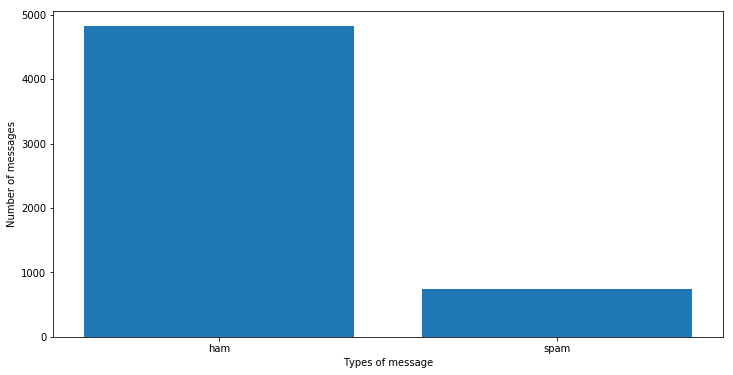

In [63]:
label_count=df.groupby('label').count()
plt.bar(label_count.index.values, label_count['message'])
plt.xlabel('Types of message')
plt.ylabel('Number of messages')
plt.show()

### Feature Generation using CountVector

In [172]:
# generate document term matrix by using scikit-learn's CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['message'])

#### Split train and test set

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['message'], test_size=0.3, random_state=1)

#### Model Building and Evaluation

Let's build the Text Classification Model using TF-IDF.

Import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

In [174]:
# fit your model on a train set using fit() and perform prediction on the test set using predict().

from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.05797967722653915


We got a classification rate of 5.79% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.


### Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer messages.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['message'])

### Split train and test set (TF-IDF)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['message'], test_size=0.3, random_state=123)

### Model Building and Evaluation (TF-IDF)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.008368200836820083


We got a classification rate of 0.83% using TF-IDF features, which is worse than with BoW.

# Feature Engineering

Lets do some feature engineering to improve the model accuracy


In [175]:
#Function to remove punctuation

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

# Apply the function to each examples

df['message'] = df['message'].apply(remove_punctuation)
df.head(10)


,label,message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me T...
7,ham,As per your request Melle Melle Oru Minnaminun...
8,spam,WINNER As a valued network customer you have b...
9,spam,Had your mobile 11 months or more U R entitled...


#### Remove Stopwords

In [177]:
from nltk.corpus import stopwords

# extracting the stopwords from nltk library
sw = stopwords.words('english')

# displaying the stopwords
np.array(sw)


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [41]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [178]:
# Function to remove stopwords

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

# Apply the function to each examples

df['message'] = df['message'].apply(stopwords)
df.head(10)


,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
5,spam,freemsg hey darling 3 weeks word back id like ...
6,ham,even brother like speak treat like aids patent
7,ham,per request melle melle oru minnaminunginte nu...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months u r entitled update latest co...


#### Top words before stemming

We will not use word counts as feature for NLP since tf-idf is a better metric

In [179]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()

# fit the count vectorizer using the text data
count_vectorizer.fit(df['message'])

# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

Store the vocab and counts in a pandas dataframe

In [180]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

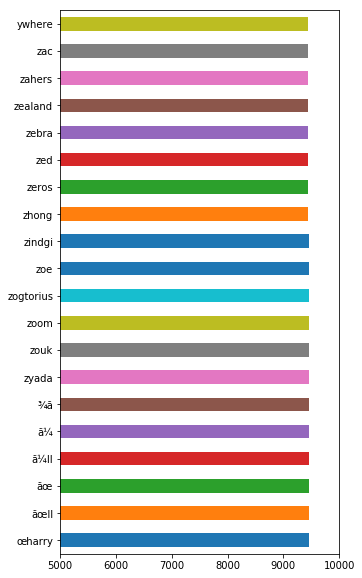

In [181]:
# Bar plot of top words before stemming

top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5000, 10000))

### Stemming operations

Stemming operation bundles together words of same root. E.g. stem operation bundles "response" and "respond" into a common "respon"

In [182]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

df['message'] = df['message'].apply(stemming)
df.head(10)

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
5,spam,freemsg hey darl 3 week word back id like fun ...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea â£9...
9,spam,mobil 11 month u r entitl updat latest colour ...


### Top words after stemming operation

Collect vocabulary count

In [183]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(df['message'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items() 

Bar plot of top words after stemming

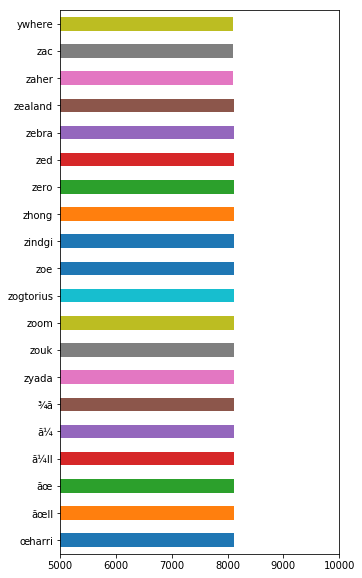

In [184]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5000, 10000))

### Histogram of text length of messages

A function to return the length of text



In [185]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

# Apply the function to each example

df['length'] = df['message'].apply(length)
df.head(10)


,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,76
1,ham,ok lar joke wif u oni,21
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,132
3,ham,u dun say earli hor u c alreadi say,35
4,ham,nah dont think goe usf live around though,41
5,spam,freemsg hey darl 3 week word back id like fun ...,85
6,ham,even brother like speak treat like aid patent,45
7,ham,per request mell mell oru minnaminungint nurun...,106
8,spam,winner valu network custom select receivea â£9...,115
9,spam,mobil 11 month u r entitl updat latest colour ...,100


Extracting data of each class

In [186]:
ham_data = df[df['label'] == 'ham']
spam_data = df[df['label'] == 'spam']

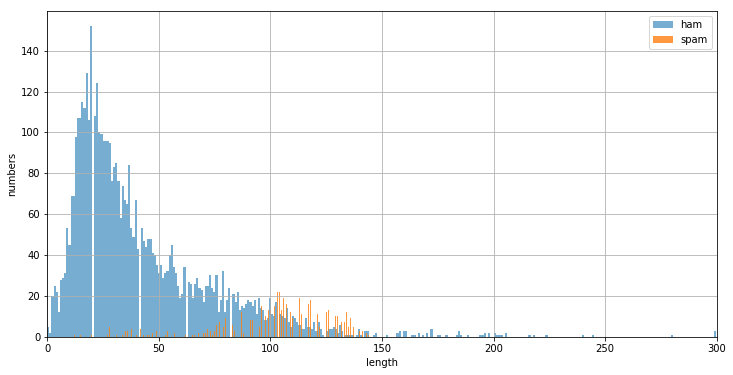

In [190]:
# As we can see the distributions coincides so it better to leave out text length 
# as a feature for predictive modelling

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(ham_data['length'], alpha = 0.6, bins=bins, label='ham')
plt.hist(spam_data['length'], alpha = 0.8, bins=bins, label='spam')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

From the histogram you can tell spam messages tend to be longer than non-spam messages.

### Top words of non-spam and spam messages and their count

#### Ham (non spam messages)

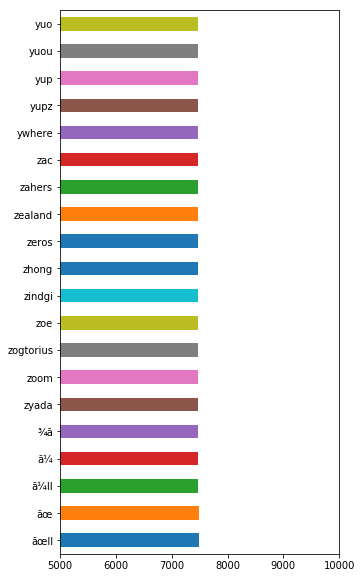

In [109]:
# create the object of tfid vectorizer
ham_tfid_vectorizer = TfidfVectorizer("english")

# fit the vectorizer using the text data
ham_tfid_vectorizer.fit(ham_data['message'])

# collect the vocabulary items used in the vectorizer
ham_dictionary = ham_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in ham_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
ham_vocab = pd.Series(count, index=vocab)
# sort the dataframe
ham_vocab = ham_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = ham_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5000, 10000))

#### Spam messages)

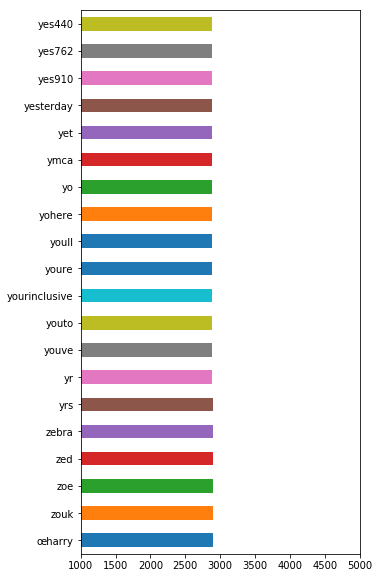

In [113]:
# create the object of tfid vectorizer
spam_tfid_vectorizer = TfidfVectorizer("english")

# fit the vectorizer using the text data
spam_tfid_vectorizer.fit(spam_data['message'])

# collect the vocabulary items used in the vectorizer
spam_dictionary = spam_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in spam_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
spam_vocab = pd.Series(count, index=vocab)
# sort the dataframe
spam_vocab = spam_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = spam_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (1000, 5000))

### Training Model

We are going to train Naive Bayes Classifier. Naive Bayes Classifier is a good choice given we have a medium sized dataset, NB classifier scales well and also NB classifier has been historically used in NLP tasks. We will train Multinomial classifier, since they almost always outperfrom Gaussian NB classifier in NLP tasks

#### TF-IDF Extraction

In [153]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df['message'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [154]:
# store the tf-idf array into pandas dataframe
df1 = pd.DataFrame(array)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8113,8114,8115,8116,8117,8118,8119,8120,8121,8122
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df1['label'] = df['label']
df1['message'] = df['message']
df1.head(10)


,0,1,2,3,4,5,6,7,8,9,...,8115,8116,8117,8118,8119,8120,8121,8122,label,message
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,go jurong point crazi avail bugi n great world...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ok lar joke wif u oni
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,u dun say earli hor u c alreadi say
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,nah dont think goe usf live around though
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,freemsg hey darl 3 week word back id like fun ...
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,even brother like speak treat like aid patent
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,per request mell mell oru minnaminungint nurun...
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,winner valu network custom select receivea â£9...
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,mobil 11 month u r entitl updat latest colour ...


In [157]:
# Features and output of the models
features = df1.drop(['label','message'], 1)

### Split train and test set (TF-IDF)

In [158]:
#Create a new column that for each row, generates a random number between 0 and 1, and
#if that value is less than or equal to .75, then sets the value of that cell as True
#and false otherwise. This is a quick and dirty way of randomly assigning some rows to
#be used as the training data and some as the test data.

df1['is_train'] = np.random.uniform(0, 1, len(df1)) <= .75

#Create two new dataframes, one with the training rows, one with the test rows

train, test = df1[df1['is_train']==True], df1[df1['is_train']==False]

#Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 4208
Number of observations in the test data: 1366


In [159]:
X = train.drop(['label','message'], 1)
Y = train['label']


# and the data for the competition submission...
X_test = test.drop(['label','message'], 1)
y_test = test['label']
print(X.head())
print(Y.head())

     0    1    2    3    4    5    6    7    8    9    ...     8114  8115  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   0.0   

   8116  8117  8118  8119  8120  8121  8122  is_train  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      True  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0      True  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0      True  
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0      True  
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0      True  

[5 rows x 8124 columns]
0     ham
1     ham
3     ham
5    spam
6     ham
Name: label, dtype: object


In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X, Y)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9612005856515373


### We got a classification rate of 96.12% using TF-IDF features, which is pretty good accuracy.

In [161]:
# apply the model to the test data and get the output...

y_output = clf.predict(X_test.fillna(0)) # get the results and fill nan's with 0
print(y_output)

['spam' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [162]:
# define the data frame for the results

Label = pd.DataFrame(y_output, columns=['Predicted_label'])

Test_ = test[['label','message']]
test_data = pd.DataFrame(Test_.reset_index(drop=True))

results = pd.concat([Label['Predicted_label'],test_data],axis=1)
results.head(15)


,Predicted_label,label,message
0,spam,spam,free entri 2 wkli comp win fa cup final tkts 2...
1,ham,ham,nah dont think goe usf live around though
2,spam,spam,mobil 11 month u r entitl updat latest colour ...
3,spam,spam,urgent 1 week free membership â£100000 prize j...
4,ham,ham,eh u rememb 2 spell name yes v naughti make v wet
5,ham,ham,iâ€˜m go tri 2 month ha ha joke
6,ham,ham,ã¼ pay first lar da stock comin
7,ham,ham,ffffffffff alright way meet sooner
8,ham,ham,forc eat slice im realli hungri tho suck mark ...
9,ham,ham,im back amp pack car ill let know there room


In [191]:
results['length'] = results['message'].apply(length)
df.head(10)


ham_ = results[results['label'] == 'ham']
pham_ = results[results['Predicted_label'] == 'ham']
spam_ = results[results['label'] == 'spam']
pspam_ = results[results['Predicted_label'] == 'spam']

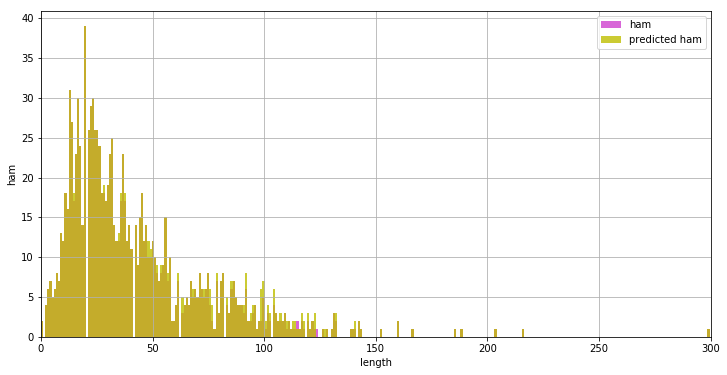

In [204]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(ham_['length'], alpha = 0.6, bins=bins, label='ham', color = 'm')
plt.hist(pham_['length'], alpha = 0.8, bins=bins, label='predicted ham', color = 'y')
plt.xlabel('length')
plt.ylabel('ham')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

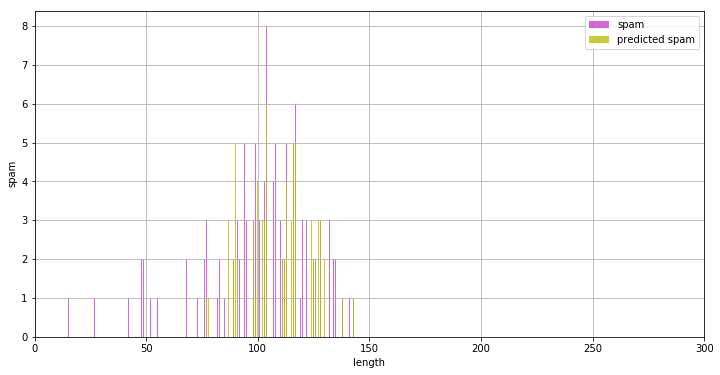

In [205]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(spam_['length'], alpha = 0.6, bins=bins, label='spam', color = 'm')
plt.hist(pspam_['length'], alpha = 0.8, bins=bins, label='predicted spam', color = 'y')
plt.xlabel('length')
plt.ylabel('spam')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

No handles with labels found to put in legend.


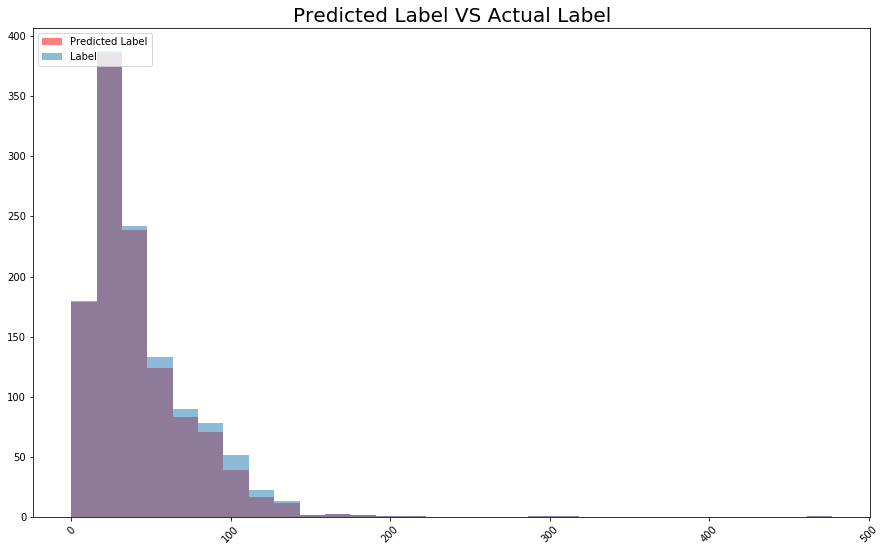

In [202]:
# Lets plot a bar graph of the predicted vs actual label of the message

plt.figure(figsize=(15, 9))
plt.title('Predicted Label VS Actual Label', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.hist(ham_['length'], alpha=0.5, bins=30, label='Predicted Label', color='red')
plt.hist(pham_['length'], alpha=0.5, bins=30, label='Label')
plt.legend(loc='upper left')
plt.show()